## Workflow compare synthetic community to native human microbiota data from the MetaCardis study
Forslund, S.K., Chakaroun, R., Zimmermann-Kogadeeva, M. et al. Combinatorial, additive and dose-dependent drug–microbiome associations. Nature 600, 500–505 (2021). https://doi.org/10.1038/s41586-021-04177-9


Data can be downloaded from https://zenodo.org/records/6242715

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

%matplotlib inline
#%matplotlib qt

In [2]:
# define data folder
human_data_folder = '..\\InputData\\human_microbiome_data\\'

In [3]:
# define figure folder
figure_folder = '..\\Figures_for_Juan\\'

In [4]:
mydata = pd.read_csv(human_data_folder + 'hub.cellcount.motu.Phylum.v2.data.frame.r',
                    sep='\t')

In [5]:
# pivot table to have samples vs features matrix
mydatatable = pd.pivot_table(mydata, values='FeatureValue',
                             index=['SampleID'],
                            columns = ['Feature'])

In [6]:
# normalize features to 1 (compositional data)
mydatatable_norm = mydatatable.div(mydatatable.sum(axis=1), axis=0)

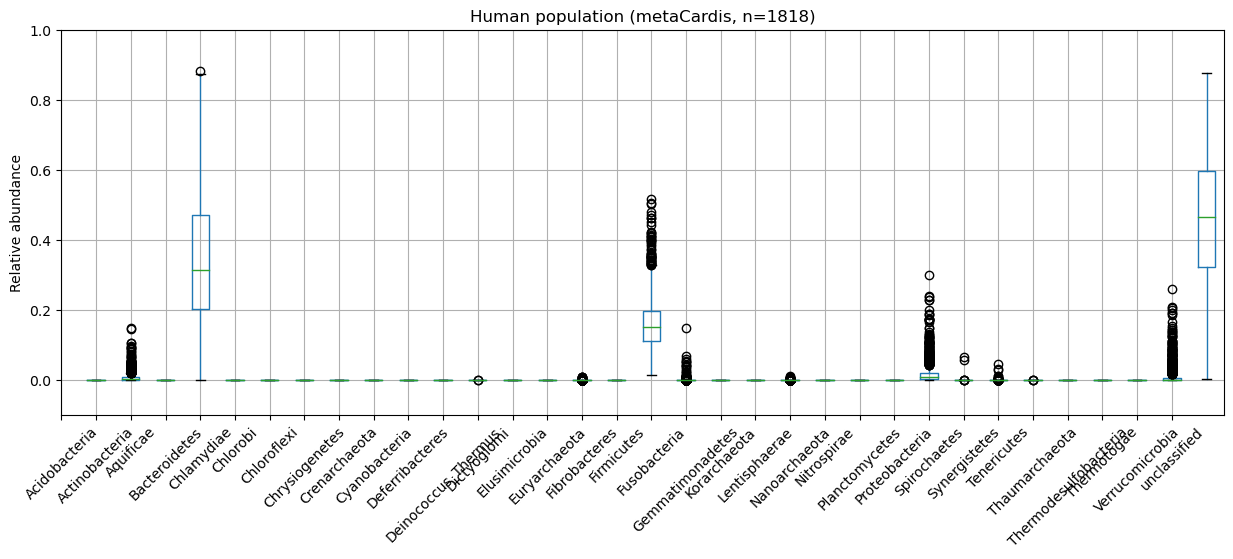

In [7]:
# plot distribution of all species across individuals
fig = plt.figure(figsize=(15, 5))
mydatatable_norm.boxplot()
plt.xticks(np.arange(0, mydatatable_norm.shape[1]), mydatatable_norm.columns);
plt.xticks(rotation=45);
ax = plt.gca()
ax.set_ylim([-0.1, 1])
ax.set_ylabel('Relative abundance')
ax.set_title('Human population (metaCardis, n=' + str(mydatatable_norm.shape[0]) + ')');


In [8]:
print('Total number of phyla: ', np.shape(mydatatable_norm.columns))

Total number of phyla:  (33,)


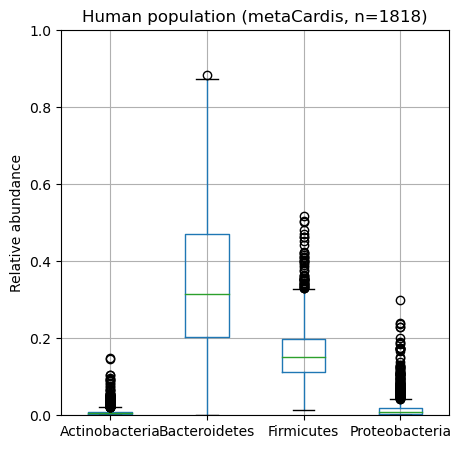

In [9]:
# plot distributions of relative phylum abundances in human samples
fig = plt.figure(figsize=(5, 5))
mydatatable_norm.boxplot(column = ['Actinobacteria', 'Bacteroidetes', 
                                    'Firmicutes', 'Proteobacteria'])
ax = plt.gca()
ax.set_ylim([0, 1])
ax.set_ylabel('Relative abundance')
ax.set_title('Human population (metaCardis, n=' + str(mydatatable_norm.shape[0]) + ')')
plt.savefig( figure_folder + 'metacardis_phylum_distribution.pdf',
                format='pdf',
                bbox_inches='tight')

## Check on species level representation of the 14 community

In [10]:
mydata_species = pd.read_csv(human_data_folder + 'hub.cellcount.motu.Species.v2.data.frame.r',
                    sep='\t')

In [11]:
# pivot table to have samples vs features
mydata_species_table = pd.pivot_table(mydata_species, values='FeatureValue',
                             index=['SampleID'],
                            columns = ['Feature'])

In [12]:
# normalize relative abundance
mydata_species_table = mydata_species_table.div(mydata_species_table.sum(axis=1), axis=0) 

In [13]:
[x for x in mydata_species_table.columns if x.find('vulgatus')>0]

['Bacteroides_dorei_vulgatus']

In [14]:
[x for x in mydata_species_table.columns if x.find('muciniph')>0]

['Akkermansia_muciniphila']

In [15]:
[x for x in mydata_species_table.columns if x.find('ramosum')>0]

['Clostridium_ramosum']

In [16]:
my_species = ['Bacteroides_uniformis',
             'Bacteroides_dorei_vulgatus',
             'Clostridium_ramosum',
             'Akkermansia_muciniphila']

In [17]:
set(my_species).intersection(mydata_species_table.columns)

{'Akkermansia_muciniphila',
 'Bacteroides_dorei_vulgatus',
 'Bacteroides_uniformis',
 'Clostridium_ramosum'}

In [18]:
mydata_species_table_selected = mydata_species_table.loc[:,my_species].copy()

In [19]:
mydata_species_table_selected.to_csv(figure_folder + 'metacardis_selected_species_abundance_4species_forJuan.csv')

In [20]:
mydata_species_table_selected_prevalence = mydata_species_table_selected.copy()
mydata_species_table_selected_prevalence = mydata_species_table_selected_prevalence.fillna(0)

In [21]:
mydata_species_table_selected_prevalence = mydata_species_table_selected_prevalence>0

In [22]:
myspecies_prevalence = mydata_species_table_selected_prevalence.sum(axis=0)*100/mydata_species_table_selected_prevalence.shape[0]

In [23]:
print("Median prevalence: ", np.median(myspecies_prevalence))

Median prevalence:  77.00770077007701


In [24]:
print("Mean prevalence: ", np.mean(myspecies_prevalence))

Mean prevalence:  69.62321232123212


In [25]:
myspecies_prevalence

Feature
Bacteroides_uniformis         97.029703
Bacteroides_dorei_vulgatus    98.569857
Clostridium_ramosum           25.907591
Akkermansia_muciniphila       56.985699
dtype: float64

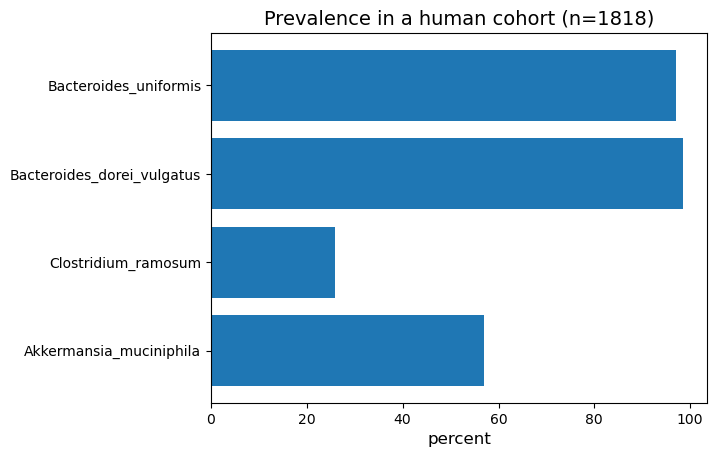

In [26]:
fig, ax = plt.subplots()
ax.barh(range(len(myspecies_prevalence)), myspecies_prevalence)
ax.set_yticks(range(len(myspecies_prevalence)))
ax.set_yticklabels(myspecies_prevalence.index)
#ax.set_ylim([0, 130]) 
#ax.set_aspect('equal')#, 'box')
# Add labels and title
plt.xlabel('percent', fontsize=12)
#plt.ylabel('number of people', fontsize=12)
plt.title('Prevalence in a human cohort (n='+str(mydata_species_table_selected_prevalence.shape[0])+')', fontsize=14)
plt.gca().invert_yaxis()
#plt.hist(percent_overlap_kegg, bins=50)
plt.savefig( figure_folder + 'myspecies_prevalence_humans.pdf',
                format='pdf',
                bbox_inches='tight')

In [27]:
print('Species prevalence in human cohort (n=', str(mydata_species_table_selected_prevalence.shape[0]),
      '): mean = ', np.mean(myspecies_prevalence),
      '; median = ', np.median(myspecies_prevalence))

Species prevalence in human cohort (n= 1818 ): mean =  69.62321232123212 ; median =  77.00770077007701


In [28]:
#plt.hist(mydata_species_table_selected.sum(axis=1),bins=100)
#mydata_species_table_selected.sum(axis=1).mean()
#mydata_species_table_selected.sum(axis=1).median()

In [29]:
# bar number of species in each individual
species_per_indivudual = (mydata_species_table_selected>0).sum(axis=1)
species_per_indivudual_sum = []
for i in range(1,len(my_species)+1):
    species_per_indivudual_sum.append(np.sum(species_per_indivudual==i))

In [30]:
species_per_indivudual_sum

[21, 540, 1058, 197]

In [31]:
print('Median species per individual: ', np.median(species_per_indivudual), 
      ' (n=', str(mydata_species_table_selected_prevalence.shape[0]), ')')

Median species per individual:  3.0  (n= 1818 )


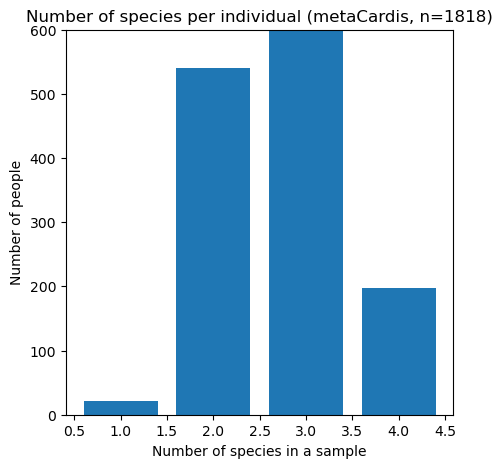

In [32]:
fig = plt.figure(figsize=(5, 5))
plt.bar(range(1,len(my_species)+1), species_per_indivudual_sum)
ax = plt.gca()
ax.set_ylim([0, 600])
ax.set_xlabel('Number of species in a sample')
ax.set_ylabel('Number of people')
ax.set_title('Number of species per individual (metaCardis, n=' + str(mydatatable_norm.shape[0]) + ')')
plt.savefig( figure_folder + 'metacardis_number_of_species_per_sample_4species_Juan.pdf',
                format='pdf',
                bbox_inches='tight')

In [33]:
mydata_species_table_selected

Feature,Bacteroides_uniformis,Bacteroides_dorei_vulgatus,Clostridium_ramosum,Akkermansia_muciniphila
SampleID,,,,
x10MCx1134,0.094217,0.078664,0.000033,0.012789
x10MCx1135,0.003392,0.001091,0.000000,0.000000
x10MCx1138,0.012615,0.135515,0.000000,0.000000
x10MCx1140,0.053910,0.055910,0.000000,0.000000
x10MCx1143,0.085567,0.206191,0.004015,0.000000
...,...,...,...,...
x30MCx3384,0.007327,0.009575,0.000000,0.000331
x30MCx3412,0.313578,0.062371,0.000000,0.000000
x30MCx3414,0.005690,0.014340,0.000000,0.001770


### Make upsetplot of prevalence of subsets of the community

In [40]:
from upsetplot import UpSet, from_indicators
from matplotlib import pyplot

In [35]:
# normalize relative abundance by 14
mydata_species_table_selected_norm = mydata_species_table_selected.div(mydata_species_table_selected.sum(axis=1), axis=0) 

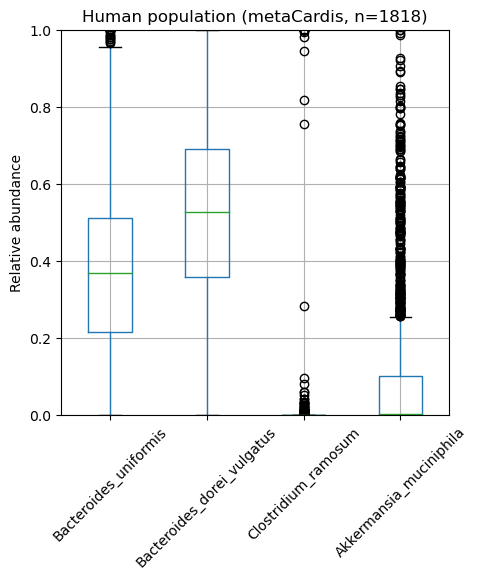

In [36]:
# plot distributions of relative phylum abundances in human samples
fig = plt.figure(figsize=(5, 5))
mydata_species_table_selected_norm.boxplot()
ax = plt.gca()
ax.set_ylim([0, 1])
ax.set_ylabel('Relative abundance')
ax.set_title('Human population (metaCardis, n=' + str(mydatatable_norm.shape[0]) + ')')
plt.xticks(rotation=45)
plt.savefig( figure_folder + 'metacardis_4species_distribution.pdf',
                format='pdf',
                bbox_inches='tight')

In [37]:
mydata_species_table_selected_binary = mydata_species_table_selected_norm>0

In [38]:
# Convert to UpSet-compatible format
upset_data = from_indicators(mydata_species_table_selected_binary.columns,mydata_species_table_selected_binary)

In [46]:
from upsetplot import generate_counts
from upsetplot import plot

In [47]:
example = generate_counts()

C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

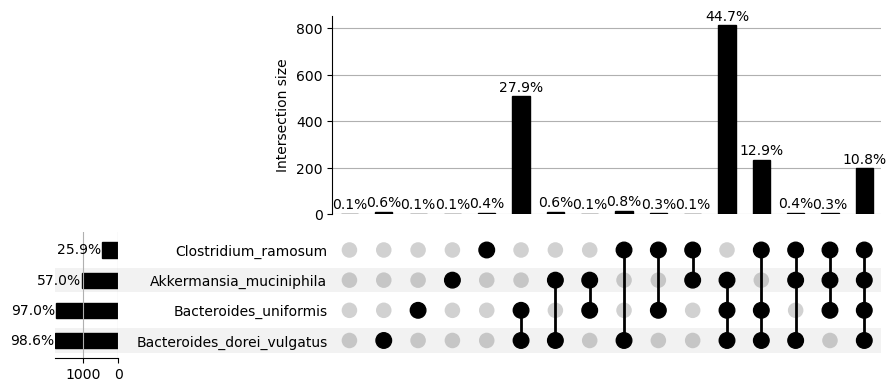

In [51]:
# Generate UpSet plot
upset = UpSet(upset_data, subset_size="count", show_percentages=True)
upset.plot()

pyplot.savefig(figure_folder + 'upset_plot_4species_coabundance.pdf') 
pyplot.show()  